## Financial analysis of a case study

The present notebook aims to answer a series of questions posteed by a business on how to approach the financial analysis of 2020 quarter 1 and 2 with the aim to provide advice to senior management based on the information extracted from the data.

In [3]:
#Importing pandas for data analysis and matplotlib for visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Importing kaggle file system
import os
working_directory = os.getcwd()

#Changing our display options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None  # default='warn'

The first step is to load the data to a Pandas dataframe and quickly inspect whether we see what is expected:

In [4]:
#Load dataset
path = working_directory + '/case_study_data_2020.csv'
data_raw = pd.read_csv(path)
data_raw.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST)
0,Jan-20,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,"€106,909","€107,080"
1,Jan-20,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,"€2,703","€2,300"
2,Jan-20,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,"€1,091","€1,031"
3,Jan-20,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,"€13,051","€10,362"
4,Jan-20,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,"€2,228","€2,015"


Before we start working with this data there is some cleaning to be done. The first operation will be to remove the currency signs and make sure that  load, shipper price and carrier price are formatted as integer (numbers).

In [5]:
#Formatting Shiper Price column
data_raw['SHIPPER_PRICE (REVENUE)'] = data_raw['SHIPPER_PRICE (REVENUE)'].str.replace('€','')
data_raw['SHIPPER_PRICE (REVENUE)'] = data_raw['SHIPPER_PRICE (REVENUE)'].str.replace(',','')
data_raw['SHIPPER_PRICE (REVENUE)'] = data_raw['SHIPPER_PRICE (REVENUE)'].astype(float)

#Formatting Carrier Price column
data_raw['CARRIER_PRICE (COST)'] = data_raw['CARRIER_PRICE (COST)'].str.replace('€','')
data_raw['CARRIER_PRICE (COST)'] = data_raw['CARRIER_PRICE (COST)'].str.replace(',','')
data_raw['CARRIER_PRICE (COST)'] = data_raw['CARRIER_PRICE (COST)'].astype(float)

#Formatting Loads column
data_raw['LOADS'] = data_raw['LOADS'].astype(int)

data_raw.head()

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST)
0,Jan-20,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,106909.00,107080.00
1,Jan-20,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,2703.00,2300.00
2,Jan-20,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,1091.00,1031.00
3,Jan-20,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,13051.00,10362.00
4,Jan-20,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,2228.00,2015.00


The first operation we will carry out is to add another column with a gross profit per operation:

$$Margin = Shipper\;Price - Carrier\;Price$$

In [6]:
#Copying the original dataset for security
data = data_raw

#Calculating margin to a new column
data['Margin'] = data['SHIPPER_PRICE (REVENUE)'] - data['CARRIER_PRICE (COST)']

data.head(5)

,PICKUP_MONTH,SHIPPER ID,SHIPPER CATEGORY,LOAD CATEGORY,ORDER_TYPE,DOMESTIC_VS_CROSS_BORDER,LOADS,SHIPPER_PRICE (REVENUE),CARRIER_PRICE (COST),Margin
0,Jan-20,0010O00001vmYzfQAE,Food & Beverages,PLATFORM,CONTRACT,domestic,141,106909.00,107080.00,-171.00
1,Jan-20,0010O00002M1P8nQAF,Industrial materials,PLATFORM,CONTRACT,cross-border,1,2703.00,2300.00,403.00
2,Jan-20,0013Y00002UjLn1QAF,Industrial materials,PLATFORM,SPOT,cross-border,1,1091.00,1031.00,60.00
3,Jan-20,0010O00002Bji22QAB,Other Manufacturing,PLATFORM,SPOT,cross-border,5,13051.00,10362.00,2689.00
4,Jan-20,0013Y00002UkaqeQAB,Food & Beverages,PLATFORM,CONTRACT,cross-border,1,2228.00,2015.00,213.00


At this point we are ready to analyze the business performance in Q1.

### 1. Evaluate how the business performed in Q1 2020 in terms of revenue, margin, volume and active customers. 

In [7]:
#Filtering Q1 dates
q1 = data[data['PICKUP_MONTH'].str.contains('jan', case = False) | data['PICKUP_MONTH'].str.contains('feb', case = False) | data['PICKUP_MONTH'].str.contains('mar', case = False)]
q2 = data[data['PICKUP_MONTH'].str.contains('apr', case = False) | data['PICKUP_MONTH'].str.contains('may', case = False) | data['PICKUP_MONTH'].str.contains('jun', case = False)]

#Calculating business performance key indicators
q1_total_revenue = q1['SHIPPER_PRICE (REVENUE)'].sum()
q1_total_expense = q1['CARRIER_PRICE (COST)'].sum()
q1_total_margin = q1['Margin'].sum()
q1_total_volume = q1['LOADS'].sum()
q1_active_customers = q1['SHIPPER ID'].nunique()

#Printing the data
print(f"The gross revenue for Q1 is € {q1_total_revenue}")
print(f"The total expense for Q1 is € {q1_total_expense}")
print(f"The gross profit (margin) for Q1 is € {q1_total_margin}")
print(f"The total volume for Q1 is {q1_total_volume}")
print(f"The number of active customers during Q1 is {q1_active_customers}")
print(f"The profit margin percentage for Q1 is {round((q1_total_margin/q1_total_expense)*100,2)}%")

The gross revenue for Q1 is € 8839677.0
The total expense for Q1 is € 8800242.0
The gross profit (margin) for Q1 is € 39435.0
The total volume for Q1 is 10091
The number of active customers during Q1 is 131
The profit margin percentage for Q1 is 0.45%


### 2. Identify the segments that the business is performing well and the ones that need improvement and verify with Q2 data

Now, let's split this data by the different segments and find out how we are doing on each one of them.

In [8]:
#Finding all possible segments in the SHIPPER CATEGORY column
segments = pd.unique(q1['SHIPPER CATEGORY'])
print(f"Margins for Q1")

#Calculating all margins for Q1
q1_margins= {}

for s in segments:
    m = q1['Margin'][q1['SHIPPER CATEGORY'] == s].sum()
    q1_margins[s] = m
    
data_items = q1_margins.items()
data_list = list(data_items)
q1_margins_df = pd.DataFrame(data_list)
q1_margins_df = q1_margins_df.rename(columns={q1_margins_df.columns[0]: 'Segment',q1_margins_df.columns[1]: 'Margin Q1'})
q1_margins_df.sort_values(by='Segment', ascending = False)
q1_margins_df.head(7)


Margins for Q1


,Segment,Margin Q1
0,Food & Beverages,7459.00
1,Industrial materials,-8369.00
2,Other Manufacturing,-6179.00
3,Other,4448.00
4,Hospitality,160404.00
5,Automotive & Automotive Supplier,8160.00
6,Consumer Goods,-126488.00


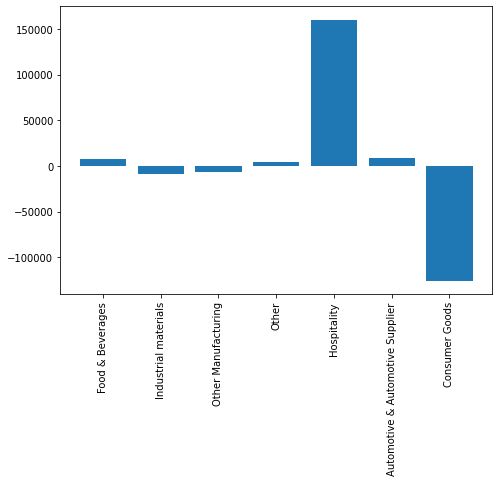

In [9]:
#Plotting the data
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(q1_margins_df['Segment'],q1_margins_df['Margin Q1'])
plt.show()

We can already see that there is high inconsistency between segments, with extremes on Hospitality, with a margin of € 160,404 and Consumer goods, with a margin of € -126,488.

Let's take a look at q2 and see if we get similar results.

In [10]:
#Calculating and displaying margins for Q2 per segment
print(f"Margins for Q2")

q2_margins= {}

for s in segments:
    m = q2['Margin'][q2['SHIPPER CATEGORY'] == s].sum()
    q2_margins[s] = m
    
data_items = q2_margins.items()
data_list = list(data_items)
q2_margins_df = pd.DataFrame(data_list)
q2_margins_df = q2_margins_df.rename(columns={q2_margins_df.columns[0]: 'Segment',q2_margins_df.columns[1]: 'Margin Q2'})
q2_margins_df.sort_values(by='Segment', ascending = False)
q2_margins_df.head(7)

Margins for Q2


,Segment,Margin Q2
0,Food & Beverages,303431.00
1,Industrial materials,21610.00
2,Other Manufacturing,71324.00
3,Other,96784.00
4,Hospitality,12821.00
5,Automotive & Automotive Supplier,3317.00
6,Consumer Goods,39436.00


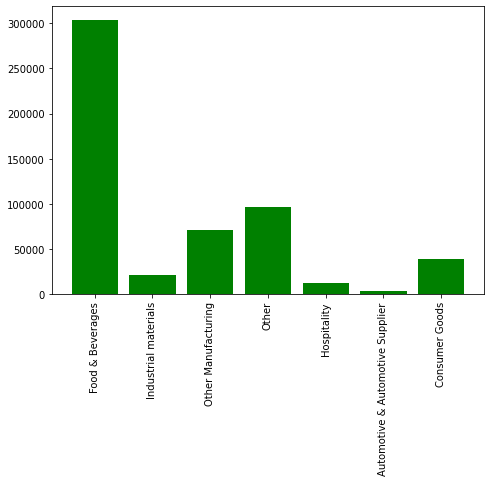

In [11]:
#Plotting the data for Q2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(q2_margins_df['Segment'],q2_margins_df['Margin Q2'], color = 'g')
plt.show()

At a first sight we can already see that there are no negative values, but if we inspect closely, some margins are actually worse than what we got in Q1.

In [12]:
#Merging Q1 and Q2 dataframes for comparison
quarters_comparison = pd.merge(q1_margins_df, q2_margins_df, on = 'Segment')

#Adding the difference column
quarters_comparison['Difference'] = quarters_comparison['Margin Q2'] - quarters_comparison['Margin Q1']

quarters_comparison.head(7)

,Segment,Margin Q1,Margin Q2,Difference
0,Food & Beverages,7459.00,303431.00,295972.00
1,Industrial materials,-8369.00,21610.00,29979.00
2,Other Manufacturing,-6179.00,71324.00,77503.00
3,Other,4448.00,96784.00,92336.00
4,Hospitality,160404.00,12821.00,-147583.00
5,Automotive & Automotive Supplier,8160.00,3317.00,-4843.00
6,Consumer Goods,-126488.00,39436.00,165924.00


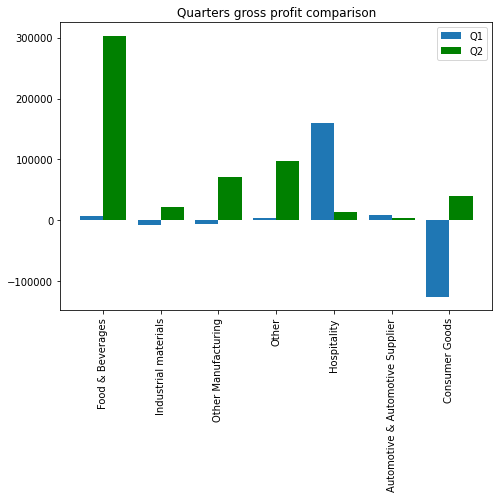

In [13]:
#Let's visualize the comparison between Q1 and Q2
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X_axis = np.arange(len(segments))

plt.xticks(rotation=90)
plt.xticks(X_axis, segments)
ax.bar(X_axis - 0.2, quarters_comparison['Margin Q1'], 0.4, label = 'Q1')
ax.bar(X_axis + 0.2, quarters_comparison['Margin Q2'], 0.4, label = 'Q2', color = 'g')
plt.title("Quarters gross profit comparison")
plt.legend()
plt.show()

We have now a good overview of the business performance over time. In general, all segments have improved their margins, except for Hospitality and Automotive & Automotive Supplier, which had a significant drop.

The most pressing issue at the moment is to assess why there are negative margins on Q1 and see what can be done or which recommendations can be given about that.

### 3. If you find any segments that need improvement, estimate the necessary price increase or cost reduction of these segments to improve Q1's profit margin by 2 percentage points with business proposals.
The previous section has thrown a very low margin for Q1 (0.45%) and our aim would be now to increase this by 2 points, so our target would be 2.45% of margin.

A quick look at the previous table reveals that the worst performing segment is Consumer goods, with a margin of € -126,488, a loss that is higher than the net income for the whole Q1 in all sectors (€ 39,435).

Let's explore this segment further to find potential patterns that could point us in the right direction on how to proceed with our strategy.

In [14]:
#Filtering the data to retrieve only the consumer goods segment for q1 and split the calculations per load category
q1_cg_lc = q1[q1['SHIPPER CATEGORY'] == 'Consumer Goods']
q1_cg_platform = q1_cg_lc['Margin'][q1_cg_lc['LOAD CATEGORY'] == 'PLATFORM'].sum()
q1_cg_platform_perc = round((len(q1_cg_lc[q1_cg_lc['LOAD CATEGORY'] == 'PLATFORM'])/len(q1_cg_lc))*100)
q1_cg_manual = q1_cg_lc['Margin'][q1_cg_lc['LOAD CATEGORY'] == 'MANUAL'].sum()

print(f"The margin for transactions entered via the platfrom was: € {q1_cg_platform}, which represents a {q1_cg_platform_perc}% of the transactions")

print(f"The margin for transactions entered maually was: € {q1_cg_manual}, which represents a {100 - q1_cg_platform_perc}% of the transactions")

The margin for transactions entered via the platfrom was: € -84620.0, which represents a 64% of the transactions
The margin for transactions entered maually was: € -41868.0, which represents a 36% of the transactions


Looking at the load category there is no much difference. Orders entered via the platform account for around 64% of the total loss in consumer goods transactions, and the net margin is -84620, approximately twice as the margin for manual transactions, which happen to represent only 36% of the total contribution. There is not much difference here.

Let's segment now by order type.

In [15]:
#Filtering the data to retrieve only the consumer goods segment for q1 and split the calculations per order type
q1_cg_contract = q1_cg_lc['Margin'][q1_cg_lc['ORDER_TYPE'] == 'CONTRACT'].sum()
q1_cg_spot = q1_cg_lc['Margin'][q1_cg_lc['ORDER_TYPE'] == 'SPOT'].sum()
q1_cg_spot_perc = round((len(q1_cg_lc[q1_cg_lc['ORDER_TYPE'] == 'SPOT'])/len(q1_cg_lc))*100)


print(f"The margin for contract transactions was: € {q1_cg_contract} which represents a {q1_cg_spot_perc}% of the transactions")
print(f"The margin for spot transactions was: € {q1_cg_spot} which represents a {100 - q1_cg_spot_perc}% of the transactions")

The margin for contract transactions was: € -125306.0 which represents a 22% of the transactions
The margin for spot transactions was: € -1182.0 which represents a 78% of the transactions


In this case we can observe how spot transactions seem to be clearly more profitable (or make us lose less money) than contract transactions. The great majority of spot transations, nearly an 80%, managed to have a negative margin of 'only' € -1182 while the small part (about 22%) of the transactions performed with a contract in place represent a loss of over 1000% relative to spot transactions.

Let's look at Domestic vs Crossborder transactions with the same approach.

In [16]:
#Filtering the data to retrieve only the consumer goods segment for q1 and split the calculations per Domestic vs Crossborder
q1_cg_domestic = q1_cg_lc['Margin'][q1_cg_lc['DOMESTIC_VS_CROSS_BORDER'] == 'domestic'].sum()
q1_cg_crossborder = q1_cg_lc['Margin'][q1_cg_lc['DOMESTIC_VS_CROSS_BORDER'] == 'cross-border'].sum()
q1_cg_domestic_perc = round((len(q1_cg_lc[q1_cg_lc['DOMESTIC_VS_CROSS_BORDER'] == 'domestic'])/len(q1_cg_lc))*100)


print(f"The margin for domestic transactions was: € {q1_cg_domestic} which represents a {q1_cg_domestic_perc}% of the transactions")
print(f"The margin for spot transactions was: € {q1_cg_crossborder} which represents a {100 - q1_cg_domestic_perc}% of the transactions")

The margin for domestic transactions was: € -57997.0 which represents a 42% of the transactions
The margin for spot transactions was: € -68491.0 which represents a 58% of the transactions


This categorization does not seem to be of much difference in terms of margin, so we won't focus our attention here.

After this exploratory analysis, it is time to check how we could increase a 2% our profit margin.

In [17]:
#Let's find the specific revenue and cost for the segments discussed above:
poor_segments = q1_margins_df['Segment'][q1_margins_df['Margin Q1'] < 0]
q1_poor_segments_contribution = q1['Margin'][q1['SHIPPER CATEGORY'].isin(poor_segments)].sum()
target_margin = q1_total_revenue*0.0245
margin_increment = target_margin - q1_total_margin

for p in poor_segments:
    i = q1_margins_df.index[q1_margins_df['Segment'] == p]
    q1_margins_df.at[i, 'Revenue'] = q1['SHIPPER_PRICE (REVENUE)'][q1['SHIPPER CATEGORY'] == p].sum()
    q1_margins_df.at[i, 'Cost'] = q1['CARRIER_PRICE (COST)'][q1['SHIPPER CATEGORY'] == p].sum()
    
q1_margins_df['Contribution'] = q1_margins_df['Margin Q1']/q1_poor_segments_contribution
#q1_margins_df['Target Margin'] = q1_margins_df['Contribution']*margin_increment
q1_margin_df_target = q1_margins_df[q1_margins_df['Segment'].isin(poor_segments)]

q1_margin_df_target.head()

,Segment,Margin Q1,Revenue,Cost,Contribution
1,Industrial materials,-8369.00,506116.00,514485.00,0.06
2,Other Manufacturing,-6179.00,1101314.00,1107493.00,0.04
6,Consumer Goods,-126488.00,1651878.00,1778366.00,0.90


If we focus our attention on the segments with a poor performance on Q1, we have the following data:
- Industrial materials:      € -8,369 (5.9% of the total loss)
- Other manufacturing:    € -6,179   (4.4% of the total loss)
- Consumer goods:        € -126,488   (89.6% of the total loss)

The total loss for segments with negative performance is € -141,036

A 0.45% margin in this case meant a total margin of € 39,435. 


__Strategy 1: Price increase__

Increasing it to a 2.45% without changing our costs would mean our target margin is:

$$2.45 = \frac{income\;-\;costs}{cost} * 100$$ 

$$Margin = €  215,606$$

Or said in other words, our revenue should go up to € 9,055,283

Our margin increment is:

$$\Delta margin = € 215,606 - € 39,435 = € 176,171$$


__Strategy 2: Cost reduction__

If we, on the other hand, chose to increase our margin by reducing costs, then our costs should drop to € 8,628,284, which would mean our margin would be:

$$Margin = €  211,393$$

Our margin increment in this case is:

$$\Delta margin = € 211,393 - € 39,435 = € 171.958$$

Let's split these differences proportionally between the poor performing sectors in Q1 and find out what our target revenue or costs would be using the different strategies

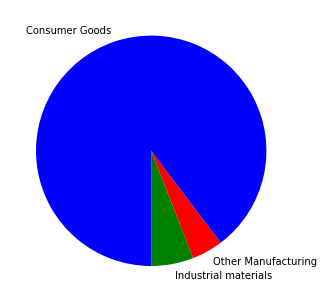

In [18]:
#Plotting the segment contributions for the negative margin
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = q1_margin_df_target['Segment']
colors = ['green', 'red', 'blue']
ax.pie(q1_margin_df_target['Contribution'], labels = labels, startangle = 270, colors = colors)
plt.show()

In [19]:
#First, let's save our calculations in the code so we can use them
margin_target_revenue = 0.0245*q1_total_expense
increment_margin_target_revenue = margin_target_revenue - q1_total_margin

total_target_cost = q1_total_revenue/1.0245
margin_target_cost = q1_total_revenue - total_target_cost
increment_margin_target_cost = margin_target_cost - q1_total_margin

#Let's create two tables now to represent both scenarios
df_margin_target_revenue = q1_margin_df_target
df_margin_target_revenue['Target margin'] =   df_margin_target_revenue['Contribution']*increment_margin_target_revenue 
df_margin_target_revenue['Target revenue'] =  df_margin_target_revenue['Revenue'] + df_margin_target_revenue['Target margin']

print('This first table shows our revenue targets if we decided to increase our prices to achieve the target')
df_margin_target_revenue.head()


This first table shows our revenue targets if we decided to increase our prices to achieve the target


,Segment,Margin Q1,Revenue,Cost,Contribution,Target margin,Target revenue
1,Industrial materials,-8369.00,506116.00,514485.00,0.06,10453.89,516569.89
2,Other Manufacturing,-6179.00,1101314.00,1107493.00,0.04,7718.31,1109032.31
6,Consumer Goods,-126488.00,1651878.00,1778366.00,0.90,157998.73,1809876.73


In [20]:
#Creating our second table
df_margin_target_cost = q1_margin_df_target
df_margin_target_cost['Target margin'] =   df_margin_target_cost['Contribution']*increment_margin_target_cost
df_margin_target_cost['Target costs'] =   df_margin_target_cost['Cost'] - df_margin_target_cost['Target margin']
print('The second table shows our cost targets if we decided to keep our prices as before')

#Bug in visual studio won't execute cells in order, mixing the calculations of different dataframes
df_margin_target_cost2 = df_margin_target_cost.drop(columns='Target revenue')
df_margin_target_cost2.head()


The second table shows our cost targets if we decided to keep our prices as before


,Segment,Margin Q1,Revenue,Cost,Contribution,Target margin,Target costs
1,Industrial materials,-8369.00,506116.00,514485.00,0.06,10203.89,504281.11
2,Other Manufacturing,-6179.00,1101314.00,1107493.00,0.04,7533.74,1099959.26
6,Consumer Goods,-126488.00,1651878.00,1778366.00,0.90,154220.33,1624145.67


The above tables display the (potential) targets for the next quarter and offers two possible strategies to achieve them.

Based on the exploration we did before, the good recommendation on where to look at in order to find potential points of improvement in cost or price is the __revision of contracts__ currently in place, as it appears that these are the biggest source of loss, significantly reducing our profit margins.

In [21]:
#Taking a look at Q2
q2_total_revenue = q2['SHIPPER_PRICE (REVENUE)'].sum()
q2_total_expense = q2['CARRIER_PRICE (COST)'].sum()
q2_total_margin = q2['Margin'].sum()
q2_total_volume = q2['LOADS'].sum()
q2_active_customers = q2['SHIPPER ID'].nunique()

#Printing the data
print(f"The gross revenue for Q2 is € {q2_total_revenue}")
print(f"The total expense for Q2 is € {q2_total_expense}")
print(f"The gross profit (margin) for Q2 is € {q2_total_margin}")
print(f"The total volume for Q2 is {q2_total_volume}")
print(f"The number of active customers during Q2 is {q2_active_customers}")
print(f"The profit margin percentage for Q2 is {round((q2_total_margin/q2_total_expense)*100,2)}%")

The gross revenue for Q2 is € 8236845.0
The total expense for Q2 is € 7688122.0
The gross profit (margin) for Q2 is € 548723.0
The total volume for Q2 is 8992
The number of active customers during Q2 is 150
The profit margin percentage for Q2 is 7.14%


Looking at Q2 it is obvious that a better scenario is possible and it becomes clear that costs can be significantly reduced or tamed. For that reason, the second recommendation would be to aim for a __costs reduction strategy__. We can focus on the poor performing segments and set their costs targets as displayed on the second table